In [1]:
#Import the necessary libraries
import pandas as pd # Loading dataset
import numpy as np #Perform numerical calculations
import matplotlib.pyplot as plt #Python visualizations
import seaborn as sns #Statistical visualizations
from scipy import stats #Statistical inferencing
from statsmodels.stats.outliers_influence import variance_inflation_factor #Checking for multicollinearity
from statsmodels.tools.tools import add_constant #Adding y-intercept to our model
from statsmodels.formula.api import ols #Linear Regression
import statsmodels.api as sm #ANOVA/ F-Statistic
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler #Preprocessing data before ML
from sklearn.model_selection import train_test_split, GridSearchCV #split our data, get the best model parameters
from sklearn.linear_model import LinearRegression, Ridge, Lasso #Linear Regression
from sklearn.tree import DecisionTreeRegressor #Tree model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor #Ensembling model
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score #Model evaluators
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
# Correct imports - note the capitalization
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data= pd.read_csv('/Users/josephmutui/Desktop/LuxDev/Python-class/crypto-classifier/data/processed/crypto_labeled_data.csv')
data['volume_ratio'] = data['volume'] / data['volume'].rolling(20).mean()
data['bb_position']  = (data['close'] - data['bb_low']) / (data['bb_high'] - data['bb_low'] + 1e-8)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   open_time              801 non-null    object 
 1   open                   801 non-null    float64
 2   high                   801 non-null    float64
 3   low                    801 non-null    float64
 4   close                  801 non-null    float64
 5   volume                 801 non-null    float64
 6   close_time             801 non-null    object 
 7   quote_asset_volume     801 non-null    float64
 8   num_trades             801 non-null    int64  
 9   taker_base_volume      801 non-null    float64
 10  taker_quote_volume     801 non-null    float64
 11  1_day_return           801 non-null    float64
 12  7_day_return           801 non-null    float64
 13  7_day_volatility       801 non-null    float64
 14  rsi                    801 non-null    float64
 15  macd  

In [16]:

# Keep only the selected feature columns 

columns_to_keep = data[[
    'volume', 
    'rsi', 
    '1_day_return',
    '7_day_return',
    '7_day_volatility',
    'macd',
    'stochastic_oscillator',
    'volume_ratio',
    'bb_position'
]]



In [17]:
#split into X and y(target)
X = columns_to_keep
y = data['label']

Feature Importance (Gain):
                 Feature  Importance  % of Total
0           volume_ratio       10944   12.609893
1           1_day_return       10552   12.158223
2  stochastic_oscillator       10023   11.548699
3       7_day_volatility        9969   11.486479
4                    rsi        9736   11.218011
5           7_day_return        9651   11.120073
6                 volume        9558   11.012916
7                   macd        8679   10.000115
8            bb_position        7677    8.845591


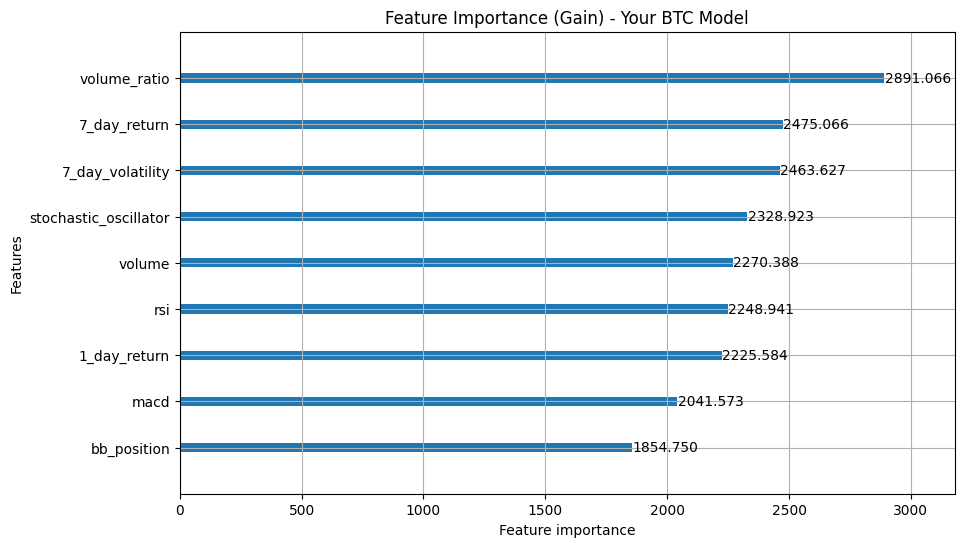

Test Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.21      0.22        19
           1       0.76      0.66      0.70        90
           2       0.16      0.33      0.22        12

    accuracy                           0.55       121
   macro avg       0.38      0.40      0.38       121
weighted avg       0.61      0.55      0.58       121



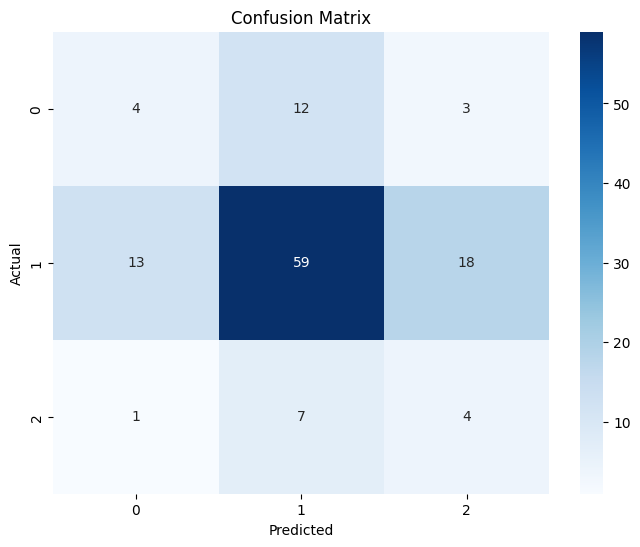

In [ ]:
train_size = 0.7
val_size = 0.15
test_size = 0.15
train_end = int(len(X) * train_size)
val_end = int(len(X) * (train_size + val_size))
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]  
from lightgbm import LGBMClassifier
model = LGBMClassifier(objective='multiclass',
 num_class=3, is_unbalance=True, scale_pos_weight=5, random_state=42, learning_rate=0.05, num_leaves=50)
    
model.fit(X_train, y_train)

import pandas as pd
importance = model.feature_importances_  # Default: gain
feature_names = model.feature_name_     # Or your features list: ['1_day_return', 'rsi', 'macd', ...]

imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
imp_df = imp_df.sort_values('Importance', ascending=False).reset_index(drop=True)
imp_df['% of Total'] = (imp_df['Importance'] / imp_df['Importance'].sum()) * 100

print("Feature Importance (Gain):")
print(imp_df)

# Plot it (visual bar chart)
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(model, ax=ax, importance_type='gain', max_num_features=10, title='Feature Importance (Gain) - Your BTC Model')
plt.show()
y_pred = model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [11:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test Accuracy: 0.52
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.11      0.11        19
           1       0.71      0.67      0.69        90
           2       0.05      0.08      0.06        12

    accuracy                           0.52       121
   macro avg       0.29      0.29      0.29       121
weighted avg       0.55      0.52      0.53       121



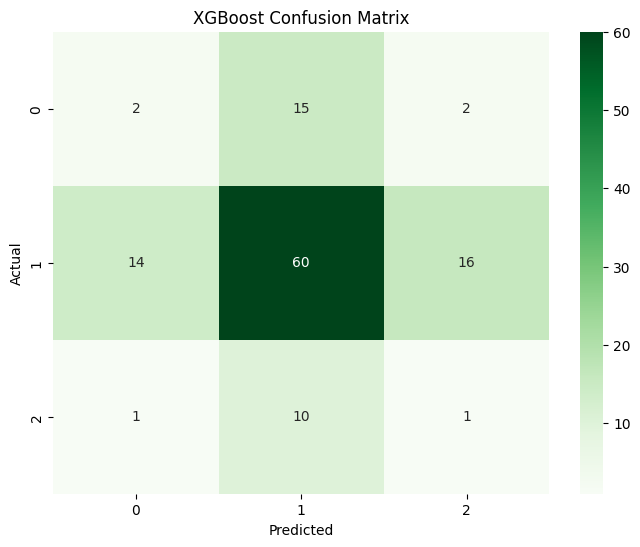

In [7]:
#train model  xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)  
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {accuracy_xgb:.2f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

Random Forest Test Accuracy: 0.68
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.73      0.91      0.81        90
           2       0.00      0.00      0.00        12

    accuracy                           0.68       121
   macro avg       0.24      0.30      0.27       121
weighted avg       0.54      0.68      0.60       121



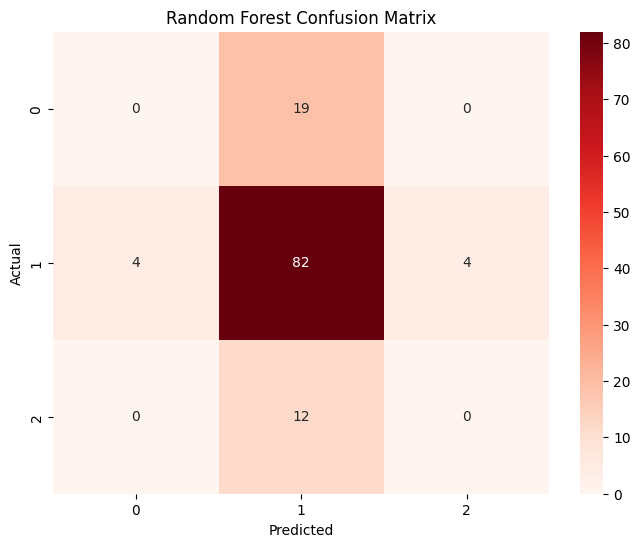

In [8]:
# train model random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)  
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

Logistic Regression Test Accuracy: 0.16
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.16      1.00      0.27        19
           1       0.00      0.00      0.00        90
           2       0.00      0.00      0.00        12

    accuracy                           0.16       121
   macro avg       0.05      0.33      0.09       121
weighted avg       0.02      0.16      0.04       121



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Fra

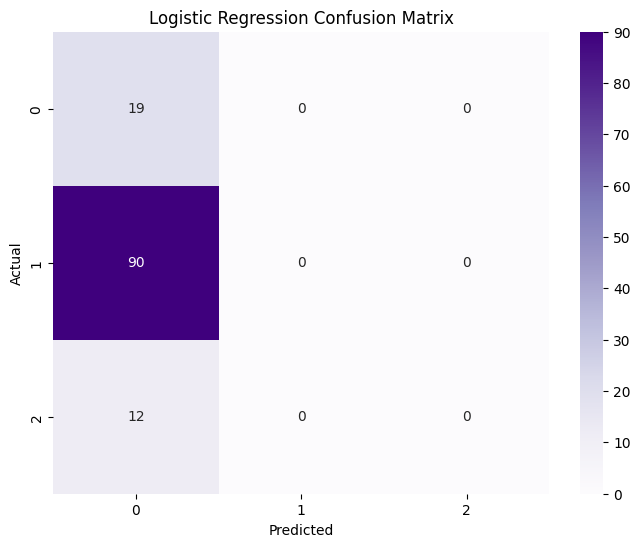

In [9]:
#train model logistic regression
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)  
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Test Accuracy: {accuracy_logreg:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()  

CatBoost Test Accuracy: 0.68
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.11      0.13        19
           1       0.74      0.89      0.81        90
           2       0.00      0.00      0.00        12

    accuracy                           0.68       121
   macro avg       0.31      0.33      0.31       121
weighted avg       0.58      0.68      0.62       121



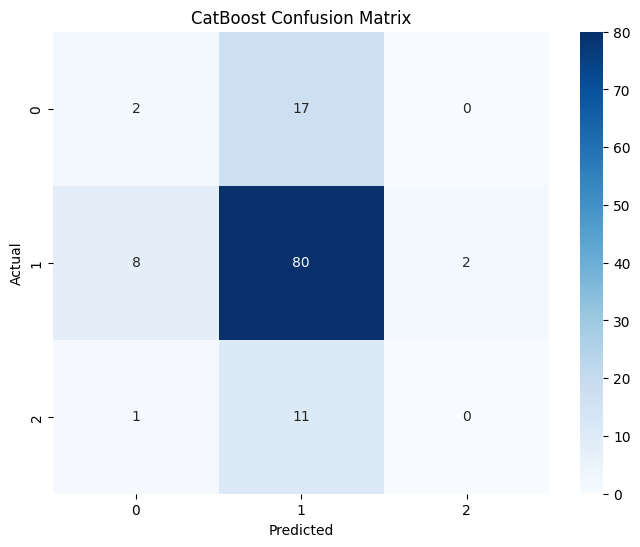

In [10]:
#train model catboost
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=0, class_weights=[1, 1, 1])
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Test Accuracy: {accuracy_cat:.2f}")
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()